<a href="https://colab.research.google.com/github/HikmahAlBaity/Wisdom/blob/main/ML_Regression_first_project_(July24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # Predicting the Value of CO2 Emissionn


#In this project, you need to build a model to predict the unknown value
#### Thinking like a data scientist, you have to follow the data science methodology, as shown in the image below:


 ### 1- Businuess Understanding

Data science methodology begins with spending the time to seek clarification. What is the problem that you are trying to solve?

Our problem here is finding the value of the CO2 Emission.

Main Goal: Predict the value of CO2 emission based on single independent variable.

Main Object: Building a predictive model.


### 2- Analytic Approach

How can you use data to answer the question/solve the problem?

Selecting the right analytic approach to solve the problem. In this project the problem is about predicting the CO2 Emission. So we are going to use Simple Linear Regression algorithm to solve the problem.

### 3- Data Requirements

Necessary data content, Data Formats, Sources for initial data collection.

In thin project we need to collect data about the CO2 emission, engine size, and Fuel consumption.



### 4- Data Collection

After the initial data collection is performed, an assessment by the data scientist takes place to determine whether or not they have what they need.

### 5- Data Understanding

Data understanding encompasses all activities related to constructing the data set.

In [1]:
import pandas as pd
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [2]:
# data understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [3]:
df.isnull().sum() # finding missing data

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [4]:
df.describe (include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


### 6- Data Preparation

Together with data collection and data understanding, data preparation is the most time-consuming phase of a data science project, typically taking 70% and even up to even 90% of the overall project time.

In [7]:
# need to select numerical group first
ndf = df[['ENGINESIZE','CO2EMISSIONS','MODELYEAR', 'FUELCONSUMPTION_CITY', 'CYLINDERS', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG'  ]]
ndf.corr()

,ENGINESIZE,CO2EMISSIONS,MODELYEAR,FUELCONSUMPTION_CITY,CYLINDERS,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
ENGINESIZE,1.000000,0.874154,NaN,0.832225,0.934011,0.778746,0.819482,-0.808554
CO2EMISSIONS,0.874154,1.000000,NaN,0.898039,0.849685,0.861748,0.892129,-0.906394
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FUELCONSUMPTION_CITY,0.832225,0.898039,NaN,1.000000,0.796473,0.965718,0.995542,-0.935613
CYLINDERS,0.934011,0.849685,NaN,0.796473,1.000000,0.724594,0.776788,-0.770430
FUELCONSUMPTION_HWY,0.778746,0.861748,NaN,0.965718,0.724594,1.000000,0.985804,-0.893809
FUELCONSUMPTION_COMB,0.819482,0.892129,NaN,0.995542,0.776788,0.985804,1.000000,-0.927965
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.906394,NaN,-0.935613,-0.770430,-0.893809,-0.927965,1.000000


<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

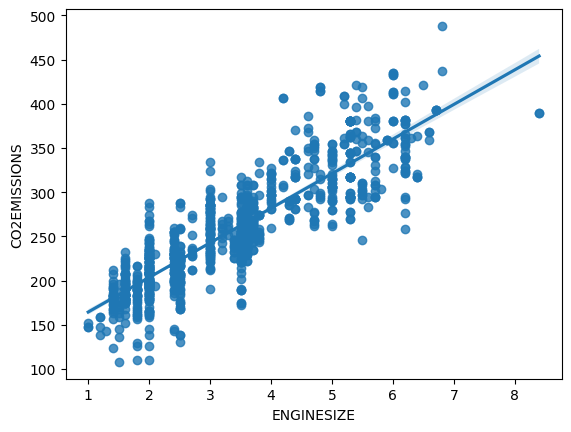

In [8]:
# regplot
from matplotlib import pyplot as plt
import seaborn as sns
sns.regplot(x = 'ENGINESIZE', y= 'CO2EMISSIONS', data = df)

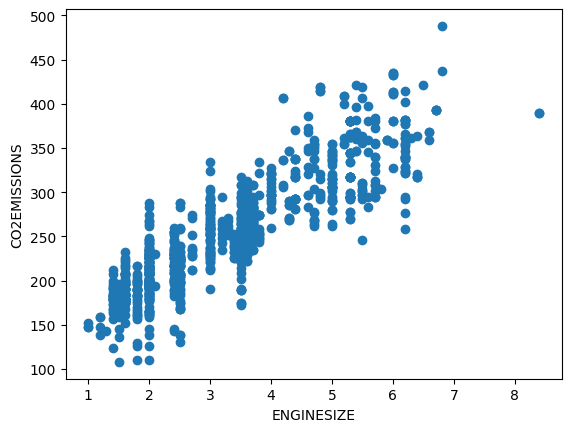

In [10]:
plt.scatter(x = 'ENGINESIZE', y= 'CO2EMISSIONS', data = df)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

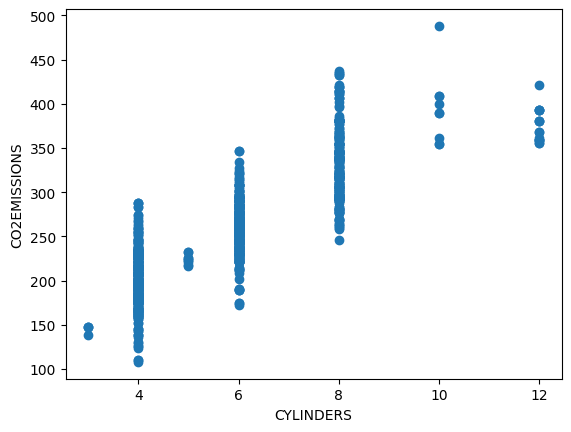

In [11]:
plt.scatter(x = 'CYLINDERS', y= 'CO2EMISSIONS', data = df)
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

<Axes: xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

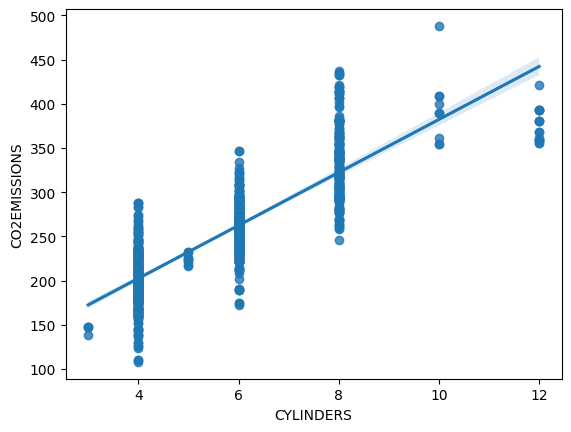

In [12]:
sns.regplot(x = 'CYLINDERS', y= 'CO2EMISSIONS', data = df)

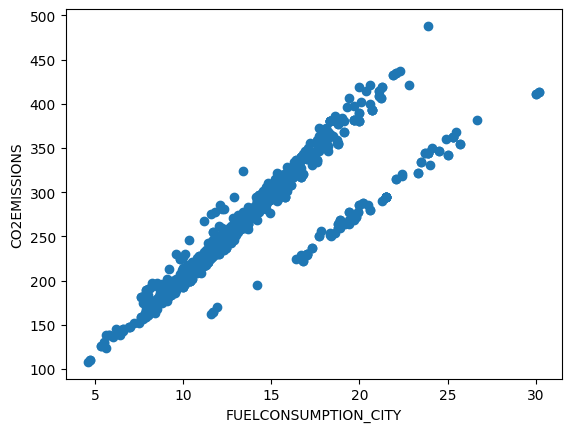

In [13]:
plt.scatter(x = 'FUELCONSUMPTION_CITY', y= 'CO2EMISSIONS', data = df)
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.show()

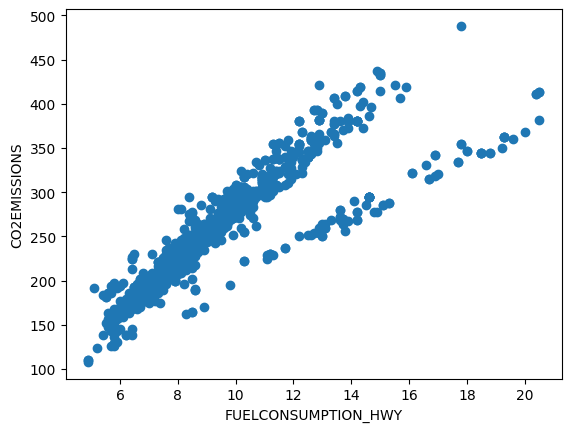

In [14]:
plt.scatter(x = 'FUELCONSUMPTION_HWY', y= 'CO2EMISSIONS', data = df)
plt.xlabel('FUELCONSUMPTION_HWY')
plt.ylabel('CO2EMISSIONS')
plt.show()

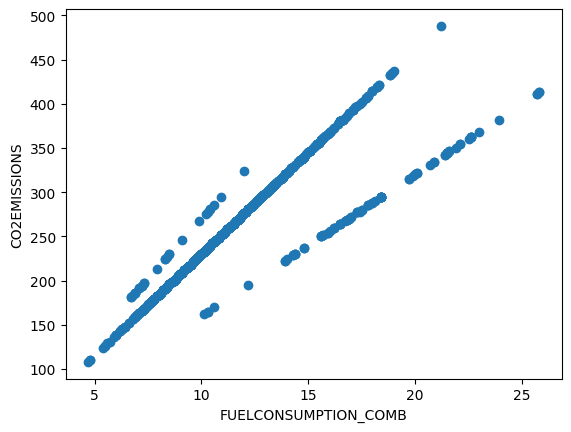

In [15]:
plt.scatter(x = 'FUELCONSUMPTION_COMB', y= 'CO2EMISSIONS', data = df)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

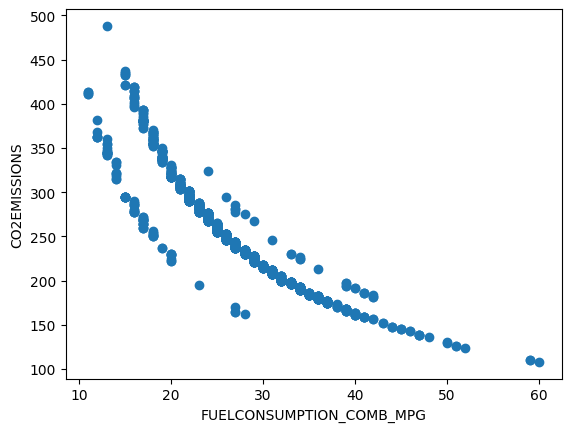

In [16]:
plt.scatter(x = 'FUELCONSUMPTION_COMB_MPG', y= 'CO2EMISSIONS', data = df)
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2EMISSIONS')
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using *np.random.rand()* function:

In [38]:
#The output will be two DataFrames: train containing about 80% of the original data and test containing the remaining 20%. The actual rows in each set will vary each time you run the code due to the random nature of the split.
import numpy as np
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]


Train and Test dataset distribution

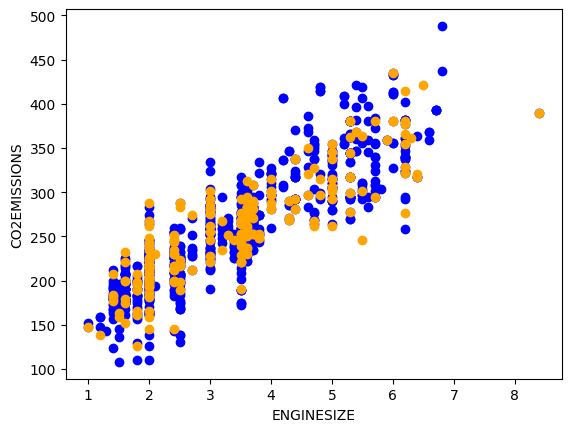

In [37]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color = 'orange')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

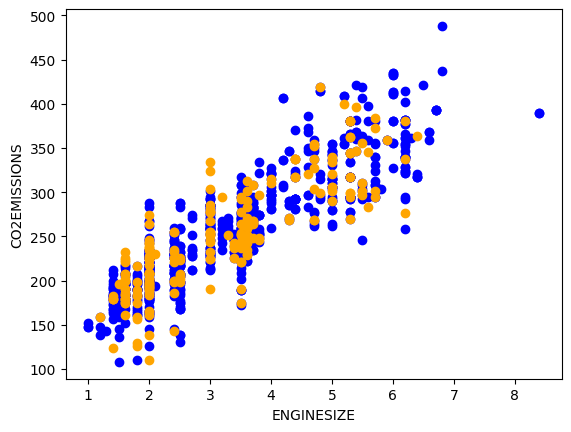

In [39]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color = 'orange')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

Text(0, 0.5, 'Emission')

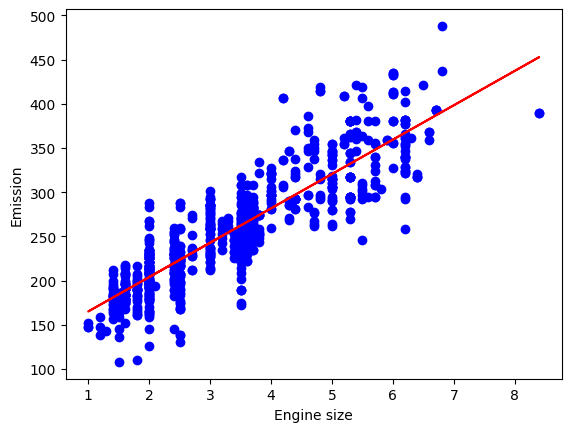

In [40]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("Engine size")
plt.ylabel("Emission")

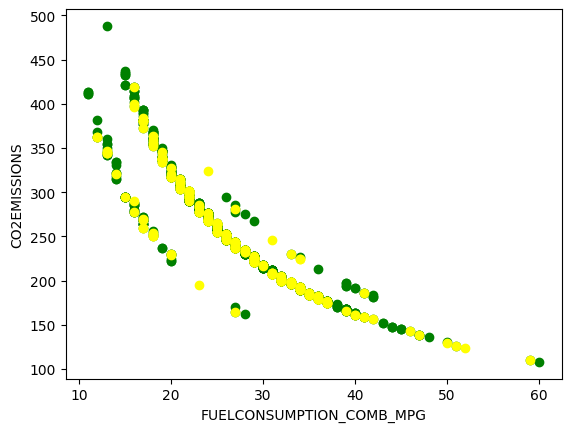

In [49]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS, color = 'green')
plt.scatter(test.FUELCONSUMPTION_COMB_MPG, test.CO2EMISSIONS, color = 'yellow')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2EMISSIONS')
plt.show()

Text(0, 0.5, 'Emission')

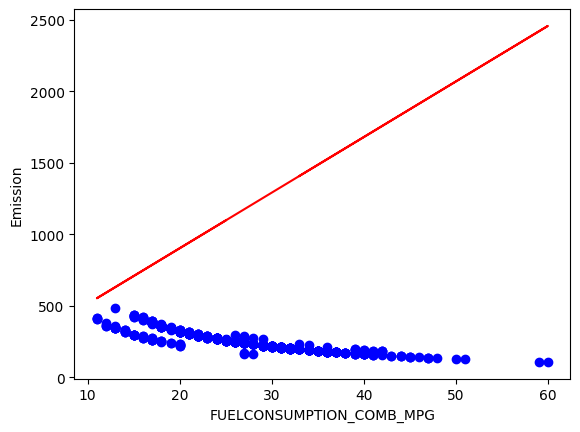

In [43]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")

#### 7- Modelling

In [19]:
from sklearn import linear_model # we need to call the algorithm of linear into our data
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training

regr.fit (train_x, train_y)

LinearRegression()

In [20]:
print ('The value of the slope is: ', regr.coef_) # mx/slope
print ('The value of the Intercept: ',regr.intercept_)

The value of the slope is:  [[38.8698587]]
The value of the Intercept:  [126.17277386]


In [23]:
x = 2.4
y = regr.intercept_ + regr.coef_ * x
y

array([[219.46043475]])

In [31]:
x = int(df['ENGINESIZE'].sample()) # random select x value
y = regr.intercept_ + regr.coef_ * x
y

<ipython-input-31-e96c1eda1e83>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x = int(df['ENGINESIZE'].sample()) # random select x value


array([[281.65220867]])

#### 8- Evaluation

In [65]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr.predict(test_x) # the prediction

print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', np.mean((test_y  - test_y_hat)**2))

The R2 is:  72.86
The MSE is:  1010.3208964531728


#### Trying to check the other correlated features

In [41]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [42]:
#FUELCONSUMPTION_COMB_MPG vs CO2EMISSIONS

#training
regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))


The R2 is:  80.18
The MSE is:  73767.83
The MAE is:  1822.41


In [44]:
#FUELCONSUMPTION_CITY vs CO2EMISSIONS

#training
regr2 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr2.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr2.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))


The R2 is:  78.35
The MSE is:  80585.14
The MAE is:  2010.87


In [45]:
#training
regr3 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr3.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr3.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))


The R2 is:  71.22
The MSE is:  107129.09
The MAE is:  2422.19


In [46]:
#training
regr4 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr4.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr4.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))


The R2 is:  72.72
The MSE is:  101549.13
The MAE is:  2486.66


In [67]:
#ENGINESIZE vs CO2EMISSIONS

#training
regr2 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']]) # Removed extra space in column name
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr2.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['ENGINESIZE']]) # Removed extra space in column name
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr2.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))

The R2 is:  72.85
The MSE is:  101074.28
The MAE is:  2451.13


#Multiple Linear Regression

In [50]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [68]:
#FUELCONSUMPTION_COMB and FUELCONSUMPTION_CITY vs CO2EMISSIONS


regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))


The R2 is:  -57.72
The MSE is:  587070.99
The MAE is:  7266.95


In [69]:
#ENGINESIZE and FUELCONSUMPTION_CITY vs CO2EMISSIONS


regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE', 'FUELCONSUMPTION_CITY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['ENGINESIZE', 'FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))


The R2 is:  83.57
The MSE is:  61172.95
The MAE is:  1837.96


In [70]:
#CYLINDERS and FUELCONSUMPTION_CITY vs CO2EMISSIONS


regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CYLINDERS', 'FUELCONSUMPTION_CITY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['CYLINDERS', 'FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))


The R2 is:  84.05
The MSE is:  59375.17
The MAE is:  1783.24


In [51]:
#FUELCONSUMPTION_COMB_MPG and FUELCONSUMPTION_HWY vs CO2EMISSIONS


regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))


The R2 is:  81.56
The MSE is:  68638.82
The MAE is:  1740.46


In [52]:
#ENGINESIZE and FUELCONSUMPTION_HWY vs CO2EMISSIONS


regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE', 'FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['ENGINESIZE', 'FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))

The R2 is:  81.99
The MSE is:  67054.93
The MAE is:  1907.68


In [53]:
#FUELCONSUMPTION_COMB and FUELCONSUMPTION_HWY vs CO2EMISSIONS

regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))


The R2 is:  78.43
The MSE is:  80297.41
The MAE is:  2011.96


In [54]:
#CYLINDERS and FUELCONSUMPTION_HWY vs CO2EMISSIONS

regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CYLINDERS', 'FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['CYLINDERS', 'FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))


The R2 is:  82.84
The MSE is:  63871.66
The MAE is:  1848.92


In [60]:
#FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY vs CO2EMISSIONS
regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))


The R2 is:  78.41
The MSE is:  80362.31
The MAE is:  2013.39


In [55]:
#FUELCONSUMPTION_COMB and FUELCONSUMPTION_COMB_MPG vs CO2EMISSIONS

regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))


The R2 is:  82.01
The MSE is:  66946.07
The MAE is:  1664.32


In [56]:
#ENGINESIZE and FUELCONSUMPTION_COMB_MPG vs CO2EMISSIONS
regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))


The R2 is:  87.02
The MSE is:  48320.63
The MAE is:  1539.65


In [57]:
#CYLINDERS and FUELCONSUMPTION_COMB_MPG vs CO2EMISSIONS
regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))


The R2 is:  87.6
The MSE is:  46153.7
The MAE is:  1418.57


In [61]:
#FUELCONSUMPTION_CITY and FUELCONSUMPTION_COMB_MPG vs CO2EMISSIONS
regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))

The R2 is:  82.1
The MSE is:  66645.7
The MAE is:  1643.83


In [58]:
#CYLINDERS and ENGINESIZE vs CO2EMISSIONS
regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CYLINDERS', 'ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['CYLINDERS', 'ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))

The R2 is:  74.2
The MSE is:  96031.09
The MAE is:  2401.58


In [59]:
#FUELCONSUMPTION_COMB and ENGINESIZE vs CO2EMISSIONS
regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB', 'ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB', 'ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))

The R2 is:  83.41
The MSE is:  61747.47
The MAE is:  1837.19


In [62]:
#FUELCONSUMPTION_CITY and ENGINESIZE vs CO2EMISSIONS
regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY', 'ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY', 'ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))

The R2 is:  83.57
The MSE is:  61172.95
The MAE is:  1837.96


In [73]:
#FUELCONSUMPTION_CITY and FUELCONSUMPTION_COMB vs CO2EMISSIONS


regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))


The R2 is:  78.4
The MSE is:  80383.26
The MAE is:  2013.62


In [74]:
#CYLINDERS and FUELCONSUMPTION_COMB vs CO2EMISSIONS


regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CYLINDERS', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['CYLINDERS', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))


The R2 is:  84.05
The MSE is:  59359.62
The MAE is:  1760.74


In [63]:
#FUELCONSUMPTION_CITY, FUELCONSUMPTION_COMB, FUELCONSUMPTION_HWY ,FUELCONSUMPTION_COMB_MPG , CYLINDERS and ENGINESIZE vs CO2EMISSIONS

regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG', 'CYLINDERS' ]])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG', 'CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))

The R2 is:  87.9
The MSE is:  45037.71
The MAE is:  1421.86


In [ ]:
import pandas as pd

def calculate_and_sort_correlations(data, target_feature):
    """
    Calculate the correlation of the target_feature to all other features
    and sort them in ascending order.

    Parameters:
    data (pd.DataFrame): The dataset containing the features.
    target_feature (str): The feature to calculate correlations against.

    Returns:
    pd.Series: Correlations of target_feature with other features, sorted in ascending order.
    """
    # Calculate the correlation matrix
    correlation_matrix = data.corr(numeric_only=True)

    # Extract the correlations for the target feature
    correlations = correlation_matrix[target_feature]

    # Drop the target feature itself
    correlations = correlations.drop(target_feature)

    # Sort the correlations in ascending order
    sorted_correlations = correlations.sort_values(ascending=True)

    return sorted_correlations